# Open pkl
**Data structure:** \
data[:, 0] - APD data, picosope chA \
data[:, 1] - CA plus or SRS output, picosope chC \
data[:, 2] - CA minus or nothing connected, picosope chD \
data[:, 3] - trigger or not recorded, picosope chB

(250000, 4)


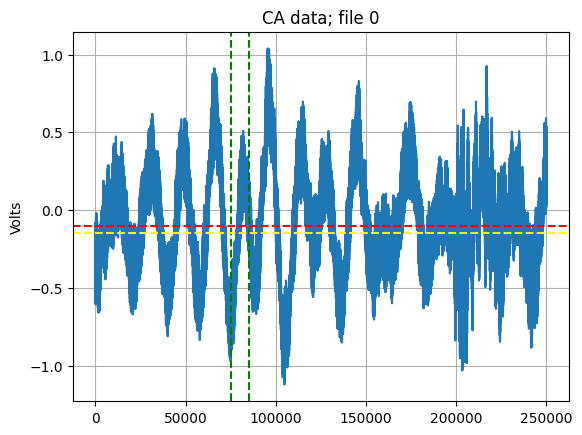

(250000, 4)


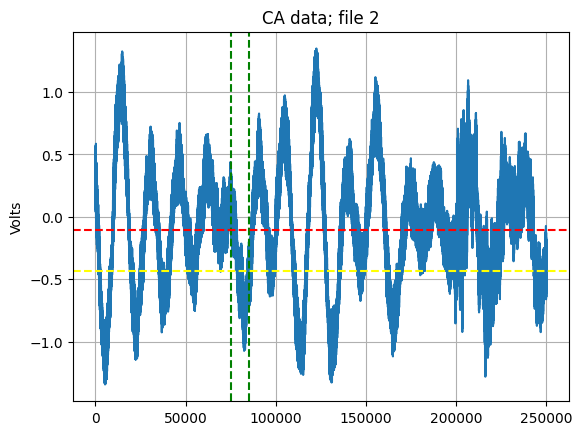

(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250000, 4)
(250

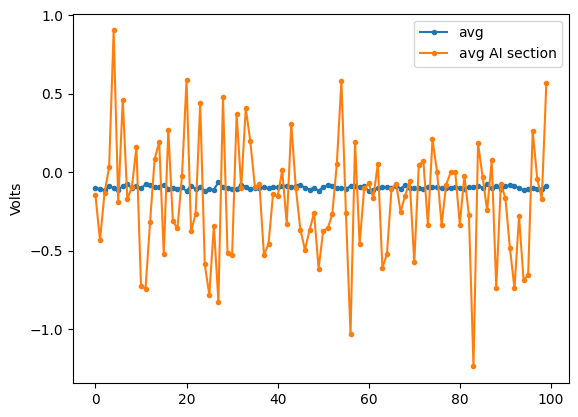

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
##########################################################################

'''FUNCTIONS'''
def pico_adc2mV(data, chRange, maxADC = 32767):
    '''Converts picoscope data from bits to mV'''
    channelInputRanges = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
    chRange = channelInputRanges[chRange]
    data_in_mV = data.astype("float")*chRange/maxADC
    return data_in_mV

def make_path_to_pkl(root_folder, date, master_run, chirp_folder):
    list_of_experiments = os.listdir('%s/%s' % (root_folder, date))
    experiment = [s for s in list_of_experiments if "AI_{}-".format(master_run) in s][0]
    path_to_experiment = '%s/%s/%s/' % (root_folder, date, experiment)
    path = '%s/%s/%s/' % (path_to_experiment, chirp_folder, master_run)
    return path

'''INPUTS'''
root_folder = r'C:\Users\Atomionics\Desktop\gravio_checks' # where root data folder on your PC
date = '2023_08_18' # date of the experiment in yy_mm_dd format
master_run = '15511' # there is a range of master runs for each experiment, type first master run of the range here
chARange = 8 # picoscope chA range, find in json or lab journal
chBRange = 8 # picoscope chB range, find in json or lab journal
chCRange = 8 # picoscope chC range, find in json or lab journal
chDRange = 8 # picoscope chD range, find in json or lab journal
chirp_folder = 'chirp_up' # choose to see pkl files for chirp up or chirp down
data_file_idx = 0 # integer from 0 to N, where N is number of files in the folder
bigT = 10e-3

'''CODE'''
ca_data_avg_arr = []
ca_data_avg_ai_section_arr = []
for data_file_idx in range(0, 200, 2): 
    path = make_path_to_pkl(root_folder, date, master_run, chirp_folder)
    data = pd.read_pickle(path+'data{}.pkl'.format(data_file_idx))
    data = pd.DataFrame(data)
    print(np.shape(data))
    data.columns = ["APD", "CA plus or SRS", "CA minus", "Trigger"]


    ### Your filters go there ###


    '''PLOTS'''
    ca_data = data["CA plus or SRS"]
    ca_data = pico_adc2mV(ca_data, chCRange)/1000
    ca_data_avg = np.mean(ca_data)

    pico_time_span = 500# ms
    Delta = pico_time_span - 50
    Delta = int(Delta*1e-3/2e-6) # 

    N_Sample = len(data["CA plus or SRS"])

    CAdata_ini = int(-150000+Delta) # 9005 .. ??? no it's 75,000
    CAdata_end = int(CAdata_ini + (2*bigT / (pico_time_span*1e-3)) * N_Sample)
    
    ca_data_avg_ai_section = np.mean(ca_data[CAdata_ini:CAdata_end])

    ca_data_avg_arr.append(ca_data_avg)
    ca_data_avg_ai_section_arr.append(ca_data_avg_ai_section)

    if data_file_idx <= 2:
        plt.plot(ca_data)
        # plt.plot(data["APD"])
        # plt.plot(data["Trigger"]/25000/0.25)
        plt.axvline(CAdata_ini, color = 'green', linestyle = '--')
        plt.axvline(CAdata_end, color = 'green', linestyle = '--')
        plt.axhline(y = ca_data_avg, color = 'red', linestyle = '--')
        plt.axhline(y = ca_data_avg_ai_section, color = 'yellow', linestyle = '--')
        # plt.xlim(CAdata_ini-500, CAdata_end+500)
        # plt.ylim(-5, 5)
        plt.ylabel('Volts')
        plt.title("CA data; file {}".format(data_file_idx))
        plt.grid()
        plt.show()

plt.plot(ca_data_avg_arr, '.-', label = 'avg')
plt.plot(ca_data_avg_ai_section_arr, '.-', label = 'avg AI section')
plt.legend()
plt.ylabel('Volts')
print("ca_data_avg = ", np.mean(ca_data_avg_arr))
print("ca_data_avg_ai_section = ", np.mean(ca_data_avg_ai_section_arr))
plt.show()

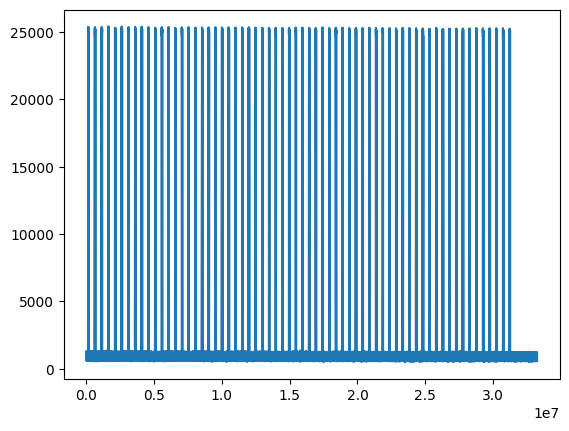

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
##########################################################################

data_file_idx = 0

path = r'C:\Users\Atomionics\Desktop\data/'
data = pd.read_pickle(path+'data{}.pkl'.format(data_file_idx))
data = pd.DataFrame(data)
data.columns = ["APD", "CA plus or SRS", "CA minus", "Trigger"]

'''Plot'''
plt.plot(data["Trigger"])
plt.show()

# Find in json

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
from datetime import datetime
import os

def find_in_json(date, master_run):
    a = datetime.strptime(date, '%Y_%m_%d').date()
    year = str(a.year)
    month = a.strftime('%B')
    day = a.day
    if day < 10:
        day = "0{}".format(day)

    jsons_archive_folder = r"\\Atomionics\Physics_Team\Dirac\results\{}\{}\{}".format(year, month, day)
    for file in os.listdir(jsons_archive_folder):
        if "{}_runtime_settings.json".format(master_run) in file:
            json_file = jsons_archive_folder + "/" + file


date = "2023_09_05"
master_run = 16246

find_in_json(date, master_run)

In [ ]:
c = 299792458

f1 = 384.2304844685e12-72.9113e6-2.56300597908911e9+61.625e6

f2 = f1 +6.725e9+112.06936e6

k1 = 2*np.pi/(c/f1)

k2 = 2*np.pi/(c/f2)

keff_max = k1+k2
bigT = 10e-3

lamb = 780e-9
print("period = ", lamb/(2*bigT**2))

mean_of_phase_rad = 360
bigT = 10e-3
mean_of_phase_chirp = mean_of_phase_rad/(2*np.pi*bigT**2)
mean_of_phase_mGal = mean_of_phase_chirp*(2*np.pi/keff_max)*1e5
print("CA_phase_mean = ", mean_of_phase_mGal)

# Fringe fitting

master_run =  15516
N points =  201


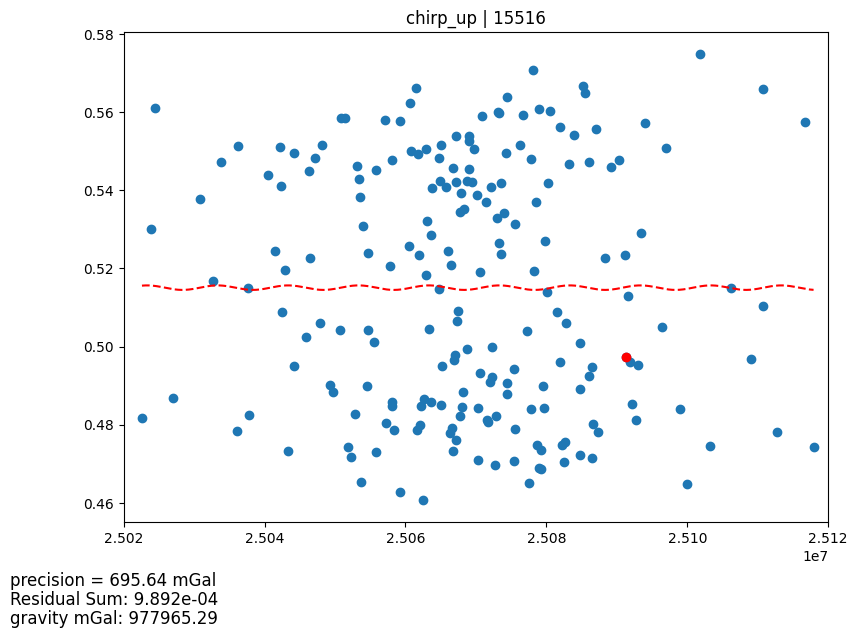

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import norm
from datetime import datetime
import os
import matplotlib.pyplot as plt
##########################################################################

def pico_adc2mV(data, chRange, maxADC):
    channelInputRanges = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000]
    chRange = channelInputRanges[chRange]

    data_in_mV = data.astype("float")*chRange/maxADC
    return data_in_mV

def sine(a,A,g,c):
    speedoflightinvacuum = 299792458
    f1 = 384.2304844685e12-72.9113e6-2.56300597908911e9+61.625e6
    f2 = f1 +6.725e9+112.06936e6
    k1 = 2*np.pi/(speedoflightinvacuum/f1)
    k2 = 2*np.pi/(speedoflightinvacuum/f2)
    # self.keff_max = k1+k2
    keff = k1+k2
    return (-A*np.cos((keff*g-2*np.pi*a)*bigT**2)+c)

def make_path_to_pkl(root_folder, date, master_run, chirp_folder):
    list_of_experiments = os.listdir('%s/%s' % (root_folder, date))
    experiment = [s for s in list_of_experiments if "AI_{}-".format(master_run) in s][0]
    path_to_experiment = '%s/%s/%s/' % (root_folder, date, experiment)
    path = '%s/%s/%s/' % (path_to_experiment, chirp_folder, master_run)
    return path



def get_chirp_data(root_folder, date, master_run, chirp_folder):
    list_of_experiments = os.listdir('%s/%s' % (root_folder, date))
    experiment = [s for s in list_of_experiments if "AI_{}-".format(master_run) in s][0]
    path_to_experiment = '%s/%s/%s/' % (root_folder, date, experiment)
    path = '%s/%s/%s' % (path_to_experiment, chirp_folder, "fringes_data.csv")
    df = pd.read_csv(path)
    chirp_data = np.array(df['var1'])*1e6
    return chirp_data



def tri(x):
    '''Triangular function'''
    if x<t[len(t)//2]:
        return x
    elif x>=t[len(t)//2]:
        return -x + 2*T



def f1(tlist,tau,T):
    flist = []
    for t in tlist:
        if 0<t<=tau:
            x = 2*tau/np.pi*(1-np.cos(np.pi/2/tau*t))
        elif tau<t<=tau+T:
            x = t+2*tau/np.pi-tau
        elif tau+T<t<=3*tau+T:
            x = T+2*tau/np.pi*(1-np.cos(np.pi/2/tau*(t-T)))
        elif 3*tau+T < t <= 3*tau+2*T:
            x = 2*T+2*tau/np.pi+3*tau-t
        elif 3*tau+2*T < t <= 4*tau+2*T:
            x = 2*tau/np.pi*(1-np.cos(np.pi/tau/2*(t-2*T)))
        else:
            x = 0
        flist += [x]
    return np.array(flist)



def num_pkl_files(path_to_pkl):
    for item in os.listdir(path_to_pkl):
        files = os.listdir(path_to_pkl)
        files = sorted(files, key=lambda x: int(x.split("data", 1)[1].split(".")[0]))
    return files



# def find_in_json(date, master_run):
#     a = datetime.strptime(date, '%Y_%m_%d').date()
#     year = str(a.year)
#     month = a.strftime('%B')
#     day = str(a.day)
#     if day < 10:
#         day = "0{}".format(month)

#     jsons_archive_folder = r"\\Atomionics\Physics_Team\Dirac\results\{}\{}\{}".format(year, month, day)
#     for file in os.listdir(jsons_archive_folder):
#         if "{}_runtime_settings.json".format(master_run) in file:
#             json_file = jsons_archive_folder + "/" + file



def calc_fraction_and_ca_phase(master_run,
                               root_folder,
                               chirp_folder,
                               date,
                               chARange,
                               chCRange,
                               chDRange,
                               bigT,
                               delay,
                               pi_pulse_duration_one,
                               pi_pulse_duration_two,
                               pi_pulse_duration_three,
                               pico_maxADC = 32767):


    path_to_pkl = make_path_to_pkl(root_folder, date, master_run, chirp_folder)
    files = num_pkl_files(path_to_pkl)

    fraction_arr = []
    phi_arr = []
    calc_fraction_and_ca_phase.accelerometer_mean = []
    calc_fraction_and_ca_phase.accelerometer = []
    for i in range(len(files)):
        '''FRACTION'''
        pkl_file = "%s%s" %(path_to_pkl, files[i])
        pkl_file = pd.read_pickle(pkl_file)

        apd_data = pkl_file[:, 0]
        apd_data = pico_adc2mV(apd_data, chARange, pico_maxADC)

        pico_time_span = 500# ms
        Delta = pico_time_span - 50
        Delta = int(Delta*1e-3/2e-6) 
        _x = 1
        # Atoms f2
        x1 = int((15010+Delta)/_x)
        x2 = int((15455+Delta)/_x)
        # Atoms f1
        x3 = int((16020+Delta)/_x)
        x4 = int((16470+Delta)/_x)
        # Noise f2
        x5 = int((15655+Delta)/_x)
        x6 = int((15970+Delta)/_x)
        # Noise f1
        x7 = int((16650+Delta)/_x)
        x8 = int((16970+Delta)/_x)

        avg_f2= apd_data[x1:x2].mean()
        avg_f2bckgd = apd_data[x5:x6].mean()
        avg_f1 = apd_data[x3:x4].mean()
        avg_f1bckgd = apd_data[x7:x8].mean()

        n2 = avg_f2-avg_f2bckgd
        n1 = avg_f1-avg_f1bckgd
        fraction = n2/(n1+n2)

        '''CA PHASE'''
        CAdata_plus = np.array(pkl_file[:, 1])/1000
        CAdata_plus = pico_adc2mV(CAdata_plus, chCRange, pico_maxADC)

        CAdata_minus = np.array(pkl_file[:, 2])/1000
        CAdata_minus = pico_adc2mV(CAdata_minus, chDRange, pico_maxADC)

        # CAdata = CAdata_plus - CAdata_minus
        CAdata = CAdata_plus/10#!!! for the amp
        CAdata = CAdata - np.mean(CAdata)*0 #!!! *0 for AC coupling
        ### Filter:
        # filterrange=[0.5,300]
        # sos = signal.butter(4, filterrange, 'bandpass', fs=500000, output='sos')
        # CA_filtered = signal.sosfilt(sos, CAdata)
        ### Bypassing filter:
        CA_filtered = CAdata

        # keff= 4*np.pi/780.241e-9
        keff = 16.1058947e6
        # T = bigT*1e-3
        N_Sample   = int(len(CA_filtered))
        CAdata_ini = int(-ca_ini+Delta)
        CAdata_end = int(CAdata_ini+2*bigT/(pico_time_span*1e-3)*N_Sample)

        a = CA_filtered[CAdata_ini+int(delay*500):CAdata_end+int(delay*500)]/8.16

        tau1 = pi_pulse_duration_one
        tau2 = pi_pulse_duration_two
        tau3 = pi_pulse_duration_three

        tau = (tau1+tau2+tau3)/6
        tt = np.linspace(0,2*bigT+4*tau,len(a))
        dt = np.diff(tt)[0]

        ft = f1(tt, tau, bigT)
        phi = keff*np.sum(np.array(a)*ft*dt)

        fraction_arr.append(fraction)
        phi_arr.append(phi)


        calc_fraction_and_ca_phase.accelerometer_mean.append(np.mean(a))
        calc_fraction_and_ca_phase.accelerometer.append(a)

        # if i == 0:
        #     plt.plot(apd_data, '.-')
        #     # plt.plot(CA_filtered, '.-')
        #     plt.axvline(CAdata_ini, color = 'green', linestyle = '--')
        #     plt.axvline(CAdata_end, color = 'green', linestyle = '--')
        #     # plt.axvline(x1, color = 'red', linestyle = '--')
        #     plt.xlim(CAdata_ini-50, CAdata_ini+50)
        #     plt.show()

        #     plt.plot(apd_data, '.-')
        #     plt.axvline(x1, color = 'red', linestyle = '--')
        #     plt.axvline(x2, color = 'red', linestyle = '--')
        #     plt.axvline(x3, color = 'red', linestyle = '--')
        #     plt.axvline(x4, color = 'red', linestyle = '--')

        #     plt.axvline(x5, color = 'green', linestyle = '--')
        #     plt.axvline(x6, color = 'green', linestyle = '--')
        #     plt.axvline(x7, color = 'green', linestyle = '--')
        #     plt.axvline(x8, color = 'green', linestyle = '--')
        #     plt.xlim(x1-50, x8+50)
        #     plt.show()

    return fraction_arr, phi_arr


def process_fringe(master_run,
                   root_folder,
                   chirp_folder,
                   date,
                   fraction,
                   ca_phase,
                   front_factor,
                   ca_mean_phase_factor):
    c = 299792458
    f1 = 384.2304844685e12-72.9113e6-2.56300597908911e9+61.625e6
    f2 = f1 +6.725e9+112.06936e6
    k1 = 2*np.pi/(c/f1)
    k2 = 2*np.pi/(c/f2)
    keff_max = k1+k2

    ca_phase = np.array(ca_phase)
    CA_phase_mean = np.array(ca_phase-ca_mean_phase_factor*ca_phase.mean())

    ##############
    # mean_of_phase_rad = ca_phase.mean()
    # mean_of_phase_chirp = mean_of_phase_rad/(2*np.pi*bigT**2)
    # mean_of_phase_mGal = mean_of_phase_chirp*(2*np.pi/keff_max)*1e5
    # print("CA_phase_mean {} = ".format(chirp_folder), mean_of_phase_mGal)
    ##############
    #
    #
    #
    chirp = get_chirp_data(root_folder, date, master_run, chirp_folder)
    chirp_corrected = chirp - front_factor * CA_phase_mean / (2 * np.pi * bigT**2)
    if chirp[0] < 0:
        chirp_corrected = chirp + front_factor*CA_phase_mean/(2*np.pi*bigT**2)

    # print("chirp = ", chirp)

    '''FIT'''
    contrast = (np.max(fraction)-np.min(fraction))/2
    g_guess = np.mean(chirp_corrected)*(2*np.pi/keff_max)
    if chirp[0]<0:
        g_guess = -9.78306# -9.77906
    else:
        g_guess = 9.77997
    # print("g_guess = ", g_guess)
    period = 780e-9/(2*bigT**2)
    fringe_offset = np.mean(fraction)
    p0 = [contrast, g_guess, fringe_offset]
    bounds = ([0, g_guess - 0.501*period, -np.inf], [1, g_guess + 0.501*period, np.inf])


    chirp_fit = np.linspace(np.min(chirp_corrected), np.max(chirp_corrected),50000)
    yfit, pcov = curve_fit(sine, chirp_corrected, fraction, p0=p0, maxfev=1000000, bounds=bounds)
    yfitdata = sine(chirp_fit, *yfit)

    '''Fit Results'''
    residuals = fraction - sine(np.array(chirp_corrected), *yfit)
    residuals = np.sum(residuals**2)/len(residuals)
    peakpos = yfit[1]*keff_max/2/np.pi
    peakpos_mGal = yfit[1]*1e5
    StdE = np.sqrt(np.diag(pcov))
    alpha=0.025
    upperfit = yfit + norm.ppf(q=1-alpha)*StdE
    lowerfit = yfit + norm.ppf(q=alpha)*StdE
    upperpeakpos = upperfit[1]*keff_max/2/np.pi
    lowerpeakpos = lowerfit[1]*keff_max/2/np.pi
    upperpeakpos_mGal = upperfit[1]*1e5
    lowerpeakpos_mGal = lowerfit[1]*1e5
    precision_mGal = max(abs(abs(lowerpeakpos_mGal)-abs(peakpos_mGal)),abs(abs(upperpeakpos_mGal)-abs(peakpos_mGal)))

    process_fringe.phase_mean = ca_phase
    process_fringe.g_value = peakpos_mGal
    process_fringe.precision = precision_mGal
    process_fringe.residuals = residuals
    process_fringe.contrast = round(np.ptp(yfitdata)/(np.max(yfitdata)+np.min(yfitdata))*100, 1)

    '''Plot'''
    idx_of_phase = 3
    chirp_val = chirp_corrected[idx_of_phase]
    fraction_val = fraction[idx_of_phase]


    # if chirp_folder == 'chirp_down':
    fig = plt.figure(figsize=(10/1.1,7/1.1))
    ax1 = fig.add_subplot(111)
    plt.scatter(chirp_corrected, fraction)
    plt.plot(chirp_fit, yfitdata,'--r')
    plt.plot(chirp_val, fraction_val, 'o', color = 'red')
    # plt.axvline(x = peakpos, color = 'red')
    # ax2 = ax1.twiny()
    # ax2.set_xlim(np.array(ax1.get_xlim())*(2*np.pi/keff_max)*1e5)
    # plt.grid()

    plt.title("{} | {}".format(chirp_folder, master_run))
    plt.figtext(0, 0.01, "precision = {} mGal".format(round(precision_mGal, 2)), wrap=True, horizontalalignment='left', fontsize=12)
    plt.figtext(0, -0.02, "Residual Sum: %s" %('{:0.3e}'.format(residuals)), wrap=True, horizontalalignment='left', fontsize=12)
    plt.figtext(0, -0.05, "gravity mGal: {}".format(round(peakpos_mGal, 2)), wrap=True, horizontalalignment='left', fontsize=12)
    plt.xlim(25.02e6, 25.12e6)
    plt.show()

    return residuals, peakpos_mGal, precision_mGal



'''INPUTS'''
root_folder = r'C:\Users\Atomionics\Desktop\gravio_checks' # where root data folder on your PC
date = '2023_08_18' # date of the experiment in yy_mm_dd format
master_run = '15932' # there is a range of master runs for each experiment, type first master run of the range here
chARange = 8 # picoscope chA range, find in json or lab journal
chBRange = 8 # picoscope chB range, find in json or lab journal
chCRange = 8 # picoscope chC range, find in json or lab journal
chDRange = 8 # picoscope chD range, find in json or lab journal
# chirp_folder = 'chirp_down' # choose to see pkl files for chirp up or chirp down
bigT = 10e-3 # s
pi_pulse_duration_one = 6.5e-6
pi_pulse_duration_two = 6.5e-6
pi_pulse_duration_three = 6.5e-6
delay = 0.37 # ms
front_factor = 0.99 # 0.99
ca_mean_phase_factor = 0
ca_ini = 150000 #9005

mean_phase_arr_up = []
accelerometer_mean_value_arr_up = []
accelerometer_value_arr_up = []
g_value_arr_up = []
precision_arr_up = []
residuals_arr_up = []
contrast_arr_up = []

mean_phase_arr_down = []
accelerometer_mean_value_arr_down = []
g_value_arr_down = []
precision_arr_down = []
residuals_arr_down = []
contrast_arr_down = []

# 15932 - 16026 : full range of master runs, sensor on Ronin, 21st Aug
# 15533 - 15570 : full range of master runs, -K locked, 18th Aug

for master_run in range(15516, 15517, 1): # 15932 - 16026 : full range of master runs
    print("master_run = ", master_run)

    # if master_run < 15932 + 73:
    #     delay = -0.5 # ms
    #     front_factor = 0.76
    # else:
    #     delay = 0.3 # ms
    #     front_factor = 0.9

    #############################################################################################################################################################
    chirp_folder = 'chirp_up' # choose to see pkl files for chirp up or chirp down
    fraction, ca_phase = calc_fraction_and_ca_phase(master_run, root_folder, chirp_folder, date, chARange, chCRange, chDRange,
                                                    bigT, delay, pi_pulse_duration_one, pi_pulse_duration_two, pi_pulse_duration_three, pico_maxADC = 32767)
    print("N points = ", len(fraction))
    residuals, peakpos_mGal_up, precision_mGal = process_fringe(master_run, root_folder, chirp_folder, date, fraction, ca_phase, front_factor, ca_mean_phase_factor)
    # print("peakpos_mGal_up = ", peakpos_mGal_up, " mGal")

    mean_phase_arr_up.append(process_fringe.phase_mean)
    accelerometer_mean_value_arr_up.append(calc_fraction_and_ca_phase.accelerometer_mean)
    accelerometer_value_arr_up.append(calc_fraction_and_ca_phase.accelerometer)
    g_value_arr_up.append(peakpos_mGal_up)
    precision_arr_up.append(precision_mGal)
    residuals_arr_up.append(residuals)
    contrast_arr_up.append(process_fringe.contrast)
    # #############################################################################################################################################################
    # chirp_folder = 'chirp_down' # choose to see pkl files for chirp up or chirp down
    # fraction, ca_phase = calc_fraction_and_ca_phase(master_run, root_folder, chirp_folder, date, chARange, chCRange, chDRange,
    #                                                 bigT, delay, pi_pulse_duration_one, pi_pulse_duration_two, pi_pulse_duration_three, pico_maxADC = 32767)
    # residuals, peakpos_mGal_down, precision_mGal = process_fringe(master_run, root_folder, chirp_folder, date, fraction, ca_phase, front_factor, ca_mean_phase_factor)
    # # print("peakpos_mGal_down = ", peakpos_mGal_down, " mGal")

    # mean_phase_arr_down.append(process_fringe.phase_mean)
    # accelerometer_mean_value_arr_down.append(calc_fraction_and_ca_phase.accelerometer_mean)
    # g_value_arr_down.append(peakpos_mGal_down)
    # precision_arr_down.append(precision_mGal)
    # residuals_arr_down.append(residuals)
    # contrast_arr_down.append(process_fringe.contrast)
    # #############################################################################################################################################################
    # gravity_combined_mGal = (peakpos_mGal_up-peakpos_mGal_down)/2
    # print("Gravity combined = ", gravity_combined_mGal, "mGal")

In [ ]:
c = 299792458
f1 = 384.2304844685e12-72.9113e6-2.56300597908911e9+61.625e6
f2 = f1 +6.725e9+112.06936e6
k1 = 2*np.pi/(c/f1)
k2 = 2*np.pi/(c/f2)
keff_max = k1+k2


period_mGal = 780e-9 / (2*bigT**2)*100*1000
period_chirp_units = period_mGal/((2*np.pi/keff_max)*1e5)
print(period_chirp_units)

9996.930489642364


In [ ]:
np.shape(accelerometer_value_arr_up)

(3, 201, 10000)

In [ ]:
np.shape(mean_phase_arr_up)

(9, 201)

In [ ]:
phase_points_per_fringe

9

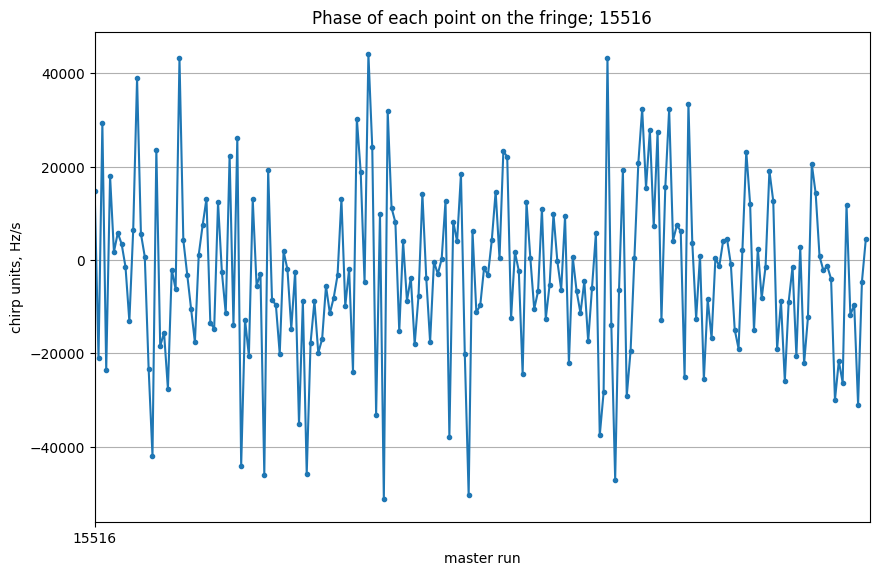

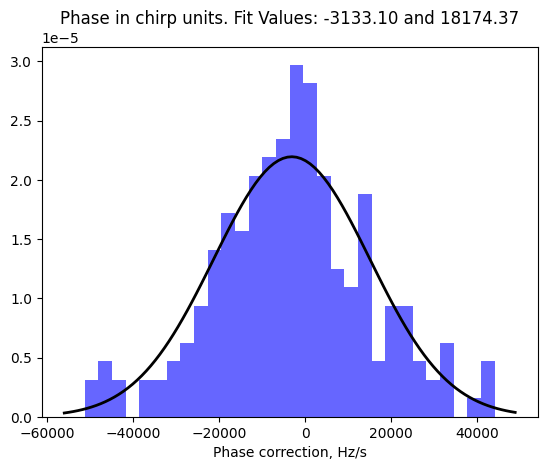

In [ ]:
'''Phase'''
master_run = range(15516, 15517, 1)
strt = 15510
stp = 15513

std_all = []
for idx, val in enumerate(master_run):
    fig = plt.figure(figsize=(10,7/1.1))
    n_fringes = np.shape(mean_phase_arr_up)[0]
    phase_points_per_fringe = np.shape(mean_phase_arr_up)[1]
    len_phase = n_fringes*phase_points_per_fringe

    phase_data = np.concatenate(np.array(mean_phase_arr_up))
    phase_data = phase_data/(2*np.pi*bigT**2)
    plt.plot(phase_data, '.-')
    plt.title("Phase of each point on the fringe; {}".format(val))
    plt.xlabel("master run")
    plt.xticks(np.arange(0, len_phase, phase_points_per_fringe), master_run)
    plt.ylabel("chirp units, Hz/s")
    plt.grid()
    plt.xlim(201*idx, 201*(idx+1))
    plt.show()

    '''Histograms'''
    # precision_combined = 0.5*np.sqrt(np.array(precision_arr_up)**2 + np.array(precision_arr_down)**2)
    # Generate some data for this
    # demonstration.
    data = phase_data[201*idx : 201*(idx+1)]

    # Fit a normal distribution to
    # the data:
    # mean and standard deviation
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    std_all.append(std)

    plt.plot(x, p, 'k', linewidth=2)
    title = "Phase in chirp units. Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    plt.xlabel("Phase correction, Hz/s")
    plt.show()


# '''AI region Raw'''
# fig = plt.figure(figsize=(20,7/1.1))
# phase_data = np.concatenate(np.concatenate(np.array(accelerometer_value_arr_up)))
# # phase_data = phase_data/(2*np.pi*bigT**2)
# plt.plot(phase_data*1e-7)
# plt.title("CA data of AI region of each fringe")
# plt.xticks(np.arange(0, len(phase_data), 10000*201), master_run)
# plt.grid()
# plt.xlabel("CA data of AI region")
# # plt.xlim(201*10000, 402*10000)
# plt.show()
# '''AI region Mean'''
# fig = plt.figure(figsize=(20,7/1.1))
# phase_data = np.concatenate(np.array(accelerometer_mean_value_arr_up))
# # phase_data = phase_data/(2*np.pi*bigT**2)
# plt.plot(phase_data*1e-7)
# plt.title("Mean of Titan AI region of each point on the fringe")
# plt.xticks(np.arange(0, 600, 200), master_run)
# plt.grid()
# plt.show()

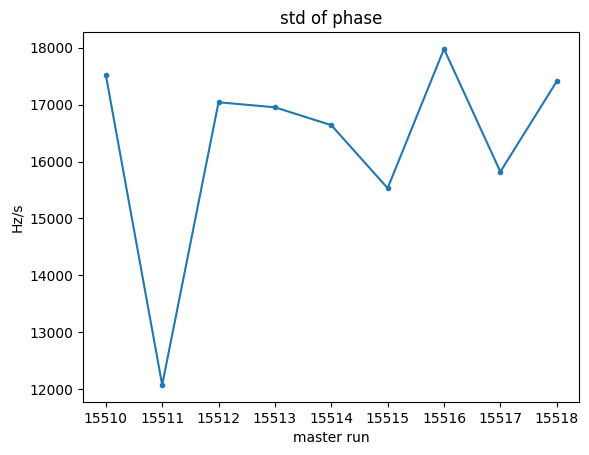

In [ ]:
plt.plot(std_all, '.-')
plt.title('std of phase')
plt.xlabel('master run')
plt.ylabel('Hz/s')
plt.xticks(np.arange(0, 9, 1), master_run)
plt.show()

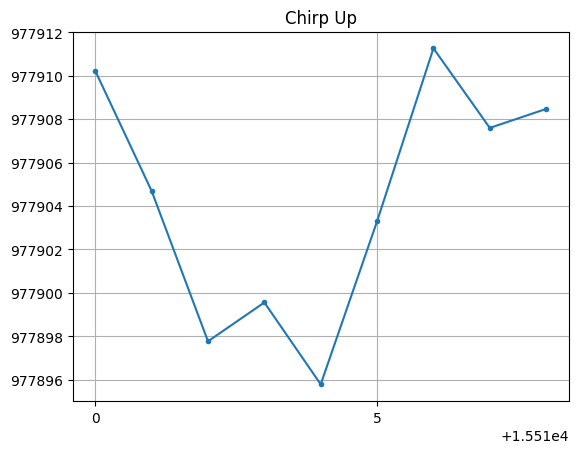

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

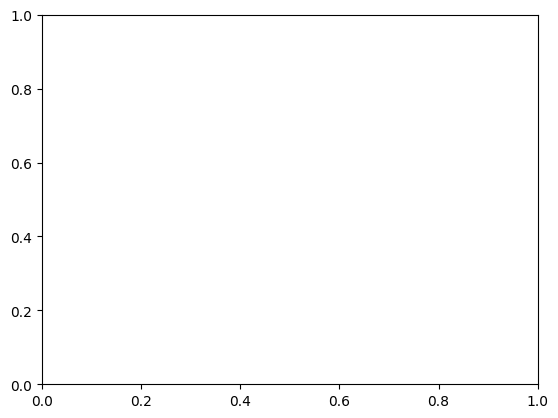

In [ ]:
fig, ax = plt.subplots(1,1)
full_range = range(15510, 15519, 1)

strt = 0
stp = len(full_range)
master_run = [m for m in range(15510, 15519, 1)]

plt.plot(master_run[strt:stp], g_value_arr_up[strt:stp], '.-', label = "Up")
plt.title("Chirp Up")
plt.grid()
plt.xticks(master_run[strt:stp:5])
plt.show()

plt.plot(master_run[strt:stp], -np.array(g_value_arr_down)[strt:stp], '.-', label = "Down")
plt.title("Chirp Down")
plt.grid()
plt.xticks(master_run[strt:stp:5])
plt.show()

'''Combined'''
g_combined = (np.array(g_value_arr_up)-np.array(g_value_arr_down))/2
plt.plot(master_run[strt:stp], g_combined[strt:stp], '.-', label = 'Combined')
plt.title("Gravity, chirp combined")
plt.xlabel("master run")
plt.ylabel("Gravity mGal")
plt.grid()
# plt.legend()
plt.xticks(master_run[strt:stp:5])
plt.show()

# '''Histograms'''
# # precision_combined = 0.5*np.sqrt(np.array(precision_arr_up)**2 + np.array(precision_arr_down)**2)
# # Generate some data for this
# # demonstration.
# data = precision_arr_down[strt:stp]

# # Fit a normal distribution to
# # the data:
# # mean and standard deviation
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=10, density=True, alpha=0.6, color='b')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', linewidth=2)
# title = "Precision chirp Down. Fit Values: {:.2f} and {:.2f}".format(mu, std)
# plt.title(title)
# plt.xlabel("precision, mGal")
# plt.show()

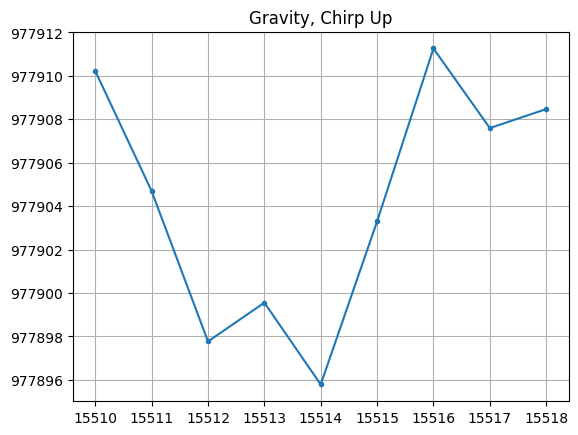

In [ ]:
fig, ax = plt.subplots(1,1)
full_range = range(15510, 15519, 1)

strt = 0
stp = len(full_range)
master_run = [m for m in range(15510, 15519, 1)]

plt.plot(g_value_arr_up[strt:stp], '.-', label = "Up")
plt.title("Gravity, Chirp Up")
plt.grid()
plt.xticks(np.arange(0, 9, 1), master_run)
plt.show()

# plt.plot(master_run[strt:stp], -np.array(g_value_arr_down)[strt:stp], '.-', label = "Down")
# plt.title("Chirp Down")
# plt.grid()
# plt.xticks(master_run[strt:stp:5])
# plt.show()

# '''Combined'''
# g_combined = (np.array(g_value_arr_up)-np.array(g_value_arr_down))/2
# plt.plot(master_run[strt:stp], g_combined[strt:stp], '.-', label = 'Combined')
# plt.title("Gravity, chirp combined")
# plt.xlabel("master run")
# plt.ylabel("Gravity mGal")
# plt.grid()
# # plt.legend()
# plt.xticks(master_run[strt:stp:5])
# plt.show()

# '''Histograms'''
# # precision_combined = 0.5*np.sqrt(np.array(precision_arr_up)**2 + np.array(precision_arr_down)**2)
# # Generate some data for this
# # demonstration.
# data = precision_arr_down[strt:stp]

# # Fit a normal distribution to
# # the data:
# # mean and standard deviation
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=10, density=True, alpha=0.6, color='b')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', linewidth=2)
# title = "Precision chirp Down. Fit Values: {:.2f} and {:.2f}".format(mu, std)
# plt.title(title)
# plt.xlabel("precision, mGal")
# plt.show()

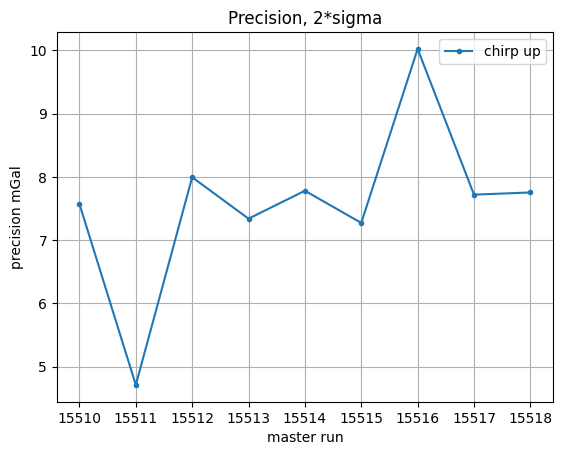

In [ ]:
full_range = range(15510, 15519, 1)
master_run = [m for m in range(15510, 15519, 1)]
strt = 0
stp = len(full_range)
'''Precision'''
# precision_combined = 0.5*np.sqrt(np.array(precision_arr_up)**2 + np.array(precision_arr_down)**2)
plt.plot(precision_arr_up[strt:stp], '.-', label = 'chirp up')
# plt.plot(master_run[strt:stp], precision_arr_down[strt:stp], '.-', label = 'chirp down')
# plt.plot(master_run[strt:stp], precision_combined[strt:stp], '.-', label = 'combined')
plt.title("Precision, 2*sigma")
plt.xlabel("master run")
plt.ylabel("precision mGal")
plt.grid()
plt.legend()
plt.xticks(np.arange(0, 9, 1), master_run)
plt.show()

# '''Contrast'''
# plt.plot(master_run, contrast_arr_up, '.-', label = 'chirp up')
# plt.plot(master_run, contrast_arr_down, '.-', label = 'chirp down')
# plt.title("Contrast")
# plt.xlabel("master run")
# plt.ylabel("contrast %")
# plt.grid()
# plt.legend()
# plt.show()

# '''Residuals'''
# plt.plot(master_run, residuals_arr_up, '.-', label = 'chirp up')
# plt.plot(master_run, residuals_arr_down, '.-', label = 'chirp down')
# plt.title("Residuals")
# plt.xlabel("master run")
# plt.ylabel("residuals")
# plt.grid()
# plt.legend()
# plt.show()

# '''Mean Phase'''
# plt.plot(master_run, mean_phase_arr_up, '.-', label = 'chirp up')
# plt.plot(master_run, mean_phase_arr_down, '.-', label = 'chirp down')
# plt.title("Mean Phase")
# plt.xlabel("master run")
# plt.ylabel("phase, rad")
# plt.grid()
# plt.legend()
# plt.show()

# '''Mean Titan'''
# # aaa = np.mean(np.array(accelerometer_mean_value_arr_up), axis = 1)
# # bbb = np.mean(np.array(accelerometer_mean_value_arr_down), axis = 1)
# aaa = np.concatenate(np.array(accelerometer_mean_value_arr_up))
# bbb = np.concatenate(np.array(accelerometer_mean_value_arr_down))
# # aaa[72] = None
# # bbb[72] = None
# plt.plot(master_run, aaa, '.-', label = 'chirp up')
# plt.plot(master_run, bbb, '.-', label = 'chirp down')
# plt.title("Mean Titan")
# plt.xlabel("master run")
# plt.ylabel("Volts")
# plt.grid()
# plt.legend()
# plt.show()


# '''Mean Titan'''
# # aaa = np.mean(np.array(accelerometer_mean_value_arr_up), axis = 1)
# # bbb = np.mean(np.array(accelerometer_mean_value_arr_down), axis = 1)
# aaa = np.concatenate(np.array(accelerometer_mean_value_arr_up))
# bbb = np.concatenate(np.array(accelerometer_mean_value_arr_down))
# aaa = aaa/4.08 # m/s**2
# bbb = bbb/4.08 # m/s**2
# aaa = aaa*100*1000 # mGal
# bbb = bbb*100*1000 # mGal
# # aaa[72] = None
# # bbb[72] = None
# plt.plot(aaa, '.-', label = 'chirp up')
# plt.plot(bbb, '.-', label = 'chirp down')
# print("test = ", len(aaa))
# plt.title("Mean Titan")
# plt.xlabel("master run")
# plt.ylabel("mGal")
# plt.grid()
# plt.legend()
# plt.ylim(-200, -70)
# plt.xticks(np.arange(0, 9400, 100), master_run[::1])
# plt.xlim(2898, 3002)
# plt.show()

# '''Histograms'''
# # precision_combined = 0.5*np.sqrt(np.array(precision_arr_up)**2 + np.array(precision_arr_down)**2)
# # Generate some data for this
# # demonstration.
# data = aaa[3000:3100]

# # Fit a normal distribution to
# # the data:
# # mean and standard deviation
# mu, std = norm.fit(data)

# # Plot the histogram.
# plt.hist(data, bins=50, density=True, alpha=0.6, color='b')

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# p = norm.pdf(x, mu, std)

# plt.plot(x, p, 'k', linewidth=2)
# title = "Mean of Titan chirp Up. Fit Values: {:.2f} and {:.2f}".format(mu, std)
# plt.title(title)
# plt.xlabel("mGal")
# plt.xlim(-180, -80)
# plt.show()

    # mean_phase_arr_up.append(process_fringe.phase_mean)
    # accelerometer_mean_value_arr_up.append(calc_fraction_and_ca_phase.accelerometer_mean)
    # g_value_arr_up.append(peakpos_mGal_up)
    # precision_arr_up.append(precision_mGal)
    # residuals_arr_up.append(residuals)
    # contrast_arr_up.append(process_fringe.contrast)

In [ ]:
np.shape(np.mean(np.array(accelerometer_mean_value_arr_up), axis = 1))

(94,)

In [ ]:
plt.plot(sum(accelerometer_mean_value_arr_up, []))
plt.plot(sum(accelerometer_mean_value_arr_down, []))

# Automatic PP optimization

In [ ]:
    mean_phase_arr_up.append(process_fringe.phase_mean)
    accelerometer_mean_value_arr_up.append(calc_fraction_and_ca_phase.accelerometer_mean)
    g_value_arr_up.append(peakpos_mGal_up)
    precision_arr_up.append(precision_mGal)
    residuals_arr_up.append(residuals)
    contrast_arr_up.append(process_fringe.contrast)

In [ ]:
df = pd.DataFrame({'mean_phase_arr_up': mean_phase_arr_up,
                   'accelerometer_mean_value_arr_up': np.array(accelerometer_mean_value_arr_up).mean(),
                   'g_value_arr_up' : g_value_arr_up,
                   'precision_arr_up' : precision_arr_up,
                   'residuals_arr_up' : residuals_arr_up,
                   'contrast_arr_up' : contrast_arr_up,

                   'mean_phase_arr_down': mean_phase_arr_down,
                   'accelerometer_mean_value_arr_down': np.array(accelerometer_mean_value_arr_down).mean(),
                   'g_value_arr_down' : g_value_arr_down,
                   'precision_arr_down' : precision_arr_down,
                   'residuals_arr_down' : residuals_arr_down,
                   'contrast_arr_down' : contrast_arr_down
                   })

# df.to_csv(r"C:\Users\Atomionics\Desktop\gravio_checks\intem_results/Aug21data.csv")
# print(df)

# Simulations

In [ ]:
c = 299792458
f1 = 384.2304844685e12-72.9113e6-2.56300597908911e9+61.625e6
f2 = f1 +6.725e9+112.06936e6
k1 = 2*np.pi/(c/f1)
k2 = 2*np.pi/(c/f2)
keff_max = k1+k2

def sine(a,A,g,c):
    speedoflightinvacuum = 299792458
    f1 = 384.2304844685e12-72.9113e6-2.56300597908911e9+61.625e6
    f2 = f1 +6.725e9+112.06936e6
    k1 = 2*np.pi/(speedoflightinvacuum/f1)
    k2 = 2*np.pi/(speedoflightinvacuum/f2)
    # self.keff_max = k1+k2
    keff = k1+k2
    return (-A*np.cos((keff*g-2*np.pi*a)*bigT**2)+c)

chirp_array = np.linspace(2.5047e7, 2.5060e7, 500)
amplitude = 1
g_value = 9.77 # m/s**2
offset = 0.5
bigT = 10e-3

y = sine(chirp_array, amplitude, g_value, offset)

fig = plt.figure(figsize=(10/1.1,7/1.1))
ax1 = fig.add_subplot(111)
plt.plot(chirp_array, y, '.-')
ax2 = ax1.twiny()
ax2.set_xlim(np.array(ax1.get_xlim())*(2*np.pi/keff_max)*1e5)
plt.show()

# Read Titan data from csv